In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [2]:
FBdata = pd.read_csv('fb_sentiment.csv')

In [3]:
FBdata

,Unnamed: 0,FBPost,Label
0,0,Drug Runners and a U.S. Senator have somethin...,O
1,1,"Heres a single, to add, to Kindle. Just read t...",O
2,2,If you tire of Non-Fiction.. Check out http://...,O
3,3,Ghost of Round Island is supposedly nonfiction.,O
4,4,Why is Barnes and Nobles version of the Kindle...,N
...,...,...,...
995,995,I liked it. Its youth oriented and I think th...,P
996,996,"I think the point of the commercial is that, e...",P
997,997,Kindle 3 is such a great product. I could not ...,P
998,998,develop a way to share books! that is a big d...,N


## DATA CLEANING 

In [5]:
FBdata = FBdata.drop(columns=["Unnamed: 0"])

In [6]:
FBdata

,FBPost,Label
0,Drug Runners and a U.S. Senator have somethin...,O
1,"Heres a single, to add, to Kindle. Just read t...",O
2,If you tire of Non-Fiction.. Check out http://...,O
3,Ghost of Round Island is supposedly nonfiction.,O
4,Why is Barnes and Nobles version of the Kindle...,N
...,...,...
995,I liked it. Its youth oriented and I think th...,P
996,"I think the point of the commercial is that, e...",P
997,Kindle 3 is such a great product. I could not ...,P
998,develop a way to share books! that is a big d...,N


## DATA PRE-PROCESSING

In [8]:
#defined a function clean_text which will remove hastags,mentions,urls,punctuation and convert to lowercase
def text_cleaning(clean_text):
    clean_text = re.sub(r'http\S+','',clean_text) #remove URLs
    clean_text = re.sub(r'@\w+','',clean_text)#remove mentions
    clean_text = re.sub(r'#\w+','',clean_text)#remove hastags
    clean_text = re.sub(r'[^\w\s]','',clean_text)#remove punctuation
    clean_text = clean_text.lower()

FBdata['cleaned_text'] = FBdata['FBPost'].apply(text_cleaning)
FBdata['cleaned_text'] = FBdata['FBPost'].fillna("")

## EXPLORATORY DATA ANALYSIS

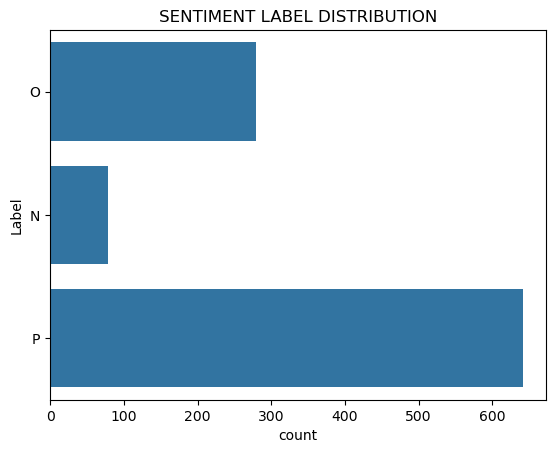

In [10]:
sns.countplot(FBdata['Label'])
plt.title('SENTIMENT LABEL DISTRIBUTION')
plt.show()

From the above graph we can conclude that the postive comments are higher than negative and neutral comments this leds to imbalance and can cause bias in the results while training and testing the model. Thus we need to oversample the model by importing RandomOverSampler

In [12]:
#extracting features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(FBdata['cleaned_text'])
y = FBdata['Label']

#oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled,y_resampled = oversampler.fit_resample(X,y)

#split the resampled dataset
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)


#Train a naive bayes model
NBmodel = MultinomialNB()
NBmodel.fit(X_train,y_train)

#predict and evalute
y_pred = NBmodel.predict(X_test)

#print evaluation metric
print("classification report:\n", classification_report(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

classification report:
               precision    recall  f1-score   support

           N       0.91      0.94      0.93       139
           O       0.83      0.77      0.80       121
           P       0.85      0.88      0.87       125

    accuracy                           0.87       385
   macro avg       0.86      0.86      0.86       385
weighted avg       0.87      0.87      0.87       385

accuracy: 0.8675324675324675


## Testing the model by giving few inputs

In [14]:
def predict_sentiment(comment,vectorizer,model):
    comment_vectorized = vectorizer.transform([comment])
    predicted_label = NBmodel.predict(comment_vectorized)[0]
    return predicted_label

In [16]:
input_comments = ["I am so happy! it's great",
                 "iT'S THE WORST. wON'T RECOMMEND",
                 "it's alright!"]

predicted_sentiments = [predict_sentiment(comment,vectorizer,NBmodel) for comment in input_comments ]

for comment,sentiment in zip(input_comments,predicted_sentiments):
    print(f"Comment: {comment}\nPredicted Sentiment: {sentiment}\n")

Comment: I am so happy! it's great
Predicted Sentiment: P

Comment: iT'S THE WORST. wON'T RECOMMEND
Predicted Sentiment: O

Comment: it's alright!
Predicted Sentiment: P

